In [19]:
import pandas as pd
import numpy as np
import seaborn as sb

In [35]:
df = pd.read_excel("ATD420.xlsx")
df.head(10)

,"ATD420. Eksports un imports 2020. gadā pa valstīm (euro un kilogrami, KN 4 zīmēs)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2020M01,2020M02,2020M03,2020M04
2,EUR,Imports,0201-Svaiga vai atdzesēta liellopu gaļa,734204,523602,577550,392881
3,NaN,NaN,0202-Saldēta liellopu gaļa,663515,588917,579336,361185
4,NaN,NaN,"0203-Cūkgaļa, svaiga, dzesināta vai saldēta",5136957,2761347,4197937,3591849
5,NaN,NaN,"0204-Svaiga, atdzesēta vai saldēta aitu vai ka...",87043,52621,148047,13796
6,NaN,NaN,"0205-Svaiga, atdzesēta vai saldēta zirgu, ēzeļ...",1894,1947,5280,1817
7,NaN,NaN,"0206-Svaigi, atdzesēti vai saldēti pārtikā lie...",314589,254079,314488,238931
8,NaN,NaN,"0207-Svaiga, atdzesēta vai saldēta Gallus dome...",3798650,2901034,2747363,2434141
9,NaN,NaN,"0208-Trušu, zaķu, baložu un citu dzīvnieku sva...",52180,56012,38041,11996


In [36]:
df.columns = ['Vienibas','Virziens','Grupa','2020M01','2020M02','2020M03','2020M04']

In [37]:
df.head()

,Vienibas,Virziens,Grupa,2020M01,2020M02,2020M03,2020M04
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2020M01,2020M02,2020M03,2020M04
2,EUR,Imports,0201-Svaiga vai atdzesēta liellopu gaļa,734204,523602,577550,392881
3,NaN,NaN,0202-Saldēta liellopu gaļa,663515,588917,579336,361185
4,NaN,NaN,"0203-Cūkgaļa, svaiga, dzesināta vai saldēta",5136957,2761347,4197937,3591849


In [38]:
#dati par importu sākas no 2 un 82 rindad 
#df.loc[df.iloc[:,1] == 'Imports']
df.loc[df['Virziens'] == 'Imports']

,Vienibas,Virziens,Grupa,2020M01,2020M02,2020M03,2020M04
2,EUR,Imports,0201-Svaiga vai atdzesēta liellopu gaļa,734204,523602,577550,392881
82,kg,Imports,0201-Svaiga vai atdzesēta liellopu gaļa,152816,102632,124590,96664


In [39]:
#dati par eksportu sākas 42 un 122 rindā
df.loc[df.iloc[:,1] == 'Eksports']

,Vienibas,Virziens,Grupa,2020M01,2020M02,2020M03,2020M04
42,NaN,Eksports,0201-Svaiga vai atdzesēta liellopu gaļa,1926245,2004217,1632077,1599957
122,NaN,Eksports,0201-Svaiga vai atdzesēta liellopu gaļa,822619,712647,600387,616201


In [40]:

df.loc[df.iloc[:,1].isnull() == False]

,Vienibas,Virziens,Grupa,2020M01,2020M02,2020M03,2020M04
2,EUR,Imports,0201-Svaiga vai atdzesēta liellopu gaļa,734204,523602,577550,392881
42,NaN,Eksports,0201-Svaiga vai atdzesēta liellopu gaļa,1926245,2004217,1632077,1599957
82,kg,Imports,0201-Svaiga vai atdzesēta liellopu gaļa,152816,102632,124590,96664
122,NaN,Eksports,0201-Svaiga vai atdzesēta liellopu gaļa,822619,712647,600387,616201


In [41]:
#noņeot tukšos ierakstus no kolonas Grupa var noskaidrot robežas, pagaidam neizdomaju ka šo automatizet
df.loc[df.iloc[:,2].isnull() == False]

,Vienibas,Virziens,Grupa,2020M01,2020M02,2020M03,2020M04
2,EUR,Imports,0201-Svaiga vai atdzesēta liellopu gaļa,734204,523602,577550,392881
3,NaN,NaN,0202-Saldēta liellopu gaļa,663515,588917,579336,361185
4,NaN,NaN,"0203-Cūkgaļa, svaiga, dzesināta vai saldēta",5136957,2761347,4197937,3591849
5,NaN,NaN,"0204-Svaiga, atdzesēta vai saldēta aitu vai ka...",87043,52621,148047,13796
6,NaN,NaN,"0205-Svaiga, atdzesēta vai saldēta zirgu, ēzeļ...",1894,1947,5280,1817
...,...,...,...,...,...,...,...
157,NaN,NaN,0709-Citi svaigi vai atdzesēti dārzeņi (izņ. p...,263001,243729,247346,214032
158,NaN,NaN,0710-Saldēti dārzeņi (termiski neapstrādāti va...,136458,125933,184739,45160
159,NaN,NaN,0711-Īslaicīgai glabāšanai iekonservēti dārzeņ...,5279,638,3464,2445
160,NaN,NaN,"0712-Kaltēti dārzeņi, veseli, sagriezti gabali...",119381,104296,116606,66871


In [42]:
df.iloc[2:42,1] = "Imports"
df.iloc[82:122,1] = "Imports"

In [43]:
df.loc[41]

Vienibas                                                  NaN
Virziens                                              Imports
Grupa       0713-Kaltēti lobīti pākšu dārzeņi, arī mizoti ...
2020M01                                               1697878
2020M02                                                776800
2020M03                                               1350398
2020M04                                               2612675
Name: 41, dtype: object

In [44]:
df.iloc[2:82,0] = "EUR"

In [45]:
df.iloc[42:82,1] = "Eksports"
df.iloc[122:162,1] = "Eksports"

In [46]:
df.iloc[82:162,0] = "kg"

In [47]:
#pārbaudām rezultātu
df.loc[df['Virziens'] == 'Eksports']

,Vienibas,Virziens,Grupa,2020M01,2020M02,2020M03,2020M04
42,EUR,Eksports,0201-Svaiga vai atdzesēta liellopu gaļa,1926245,2004217,1632077,1599957
43,EUR,Eksports,0202-Saldēta liellopu gaļa,348014,310110,276784,282446
44,EUR,Eksports,"0203-Cūkgaļa, svaiga, dzesināta vai saldēta",612841,584685,659444,494858
45,EUR,Eksports,"0204-Svaiga, atdzesēta vai saldēta aitu vai ka...",115964,104079,68702,32736
46,EUR,Eksports,"0205-Svaiga, atdzesēta vai saldēta zirgu, ēzeļ...",0,0,0,0
...,...,...,...,...,...,...,...
157,kg,Eksports,0709-Citi svaigi vai atdzesēti dārzeņi (izņ. p...,263001,243729,247346,214032
158,kg,Eksports,0710-Saldēti dārzeņi (termiski neapstrādāti va...,136458,125933,184739,45160
159,kg,Eksports,0711-Īslaicīgai glabāšanai iekonservēti dārzeņ...,5279,638,3464,2445
160,kg,Eksports,"0712-Kaltēti dārzeņi, veseli, sagriezti gabali...",119381,104296,116606,66871


In [48]:
df = df.loc[df['Grupa'].isnull() == False]
df

,Vienibas,Virziens,Grupa,2020M01,2020M02,2020M03,2020M04
2,EUR,Imports,0201-Svaiga vai atdzesēta liellopu gaļa,734204,523602,577550,392881
3,EUR,Imports,0202-Saldēta liellopu gaļa,663515,588917,579336,361185
4,EUR,Imports,"0203-Cūkgaļa, svaiga, dzesināta vai saldēta",5136957,2761347,4197937,3591849
5,EUR,Imports,"0204-Svaiga, atdzesēta vai saldēta aitu vai ka...",87043,52621,148047,13796
6,EUR,Imports,"0205-Svaiga, atdzesēta vai saldēta zirgu, ēzeļ...",1894,1947,5280,1817
...,...,...,...,...,...,...,...
157,kg,Eksports,0709-Citi svaigi vai atdzesēti dārzeņi (izņ. p...,263001,243729,247346,214032
158,kg,Eksports,0710-Saldēti dārzeņi (termiski neapstrādāti va...,136458,125933,184739,45160
159,kg,Eksports,0711-Īslaicīgai glabāšanai iekonservēti dārzeņ...,5279,638,3464,2445
160,kg,Eksports,"0712-Kaltēti dārzeņi, veseli, sagriezti gabali...",119381,104296,116606,66871


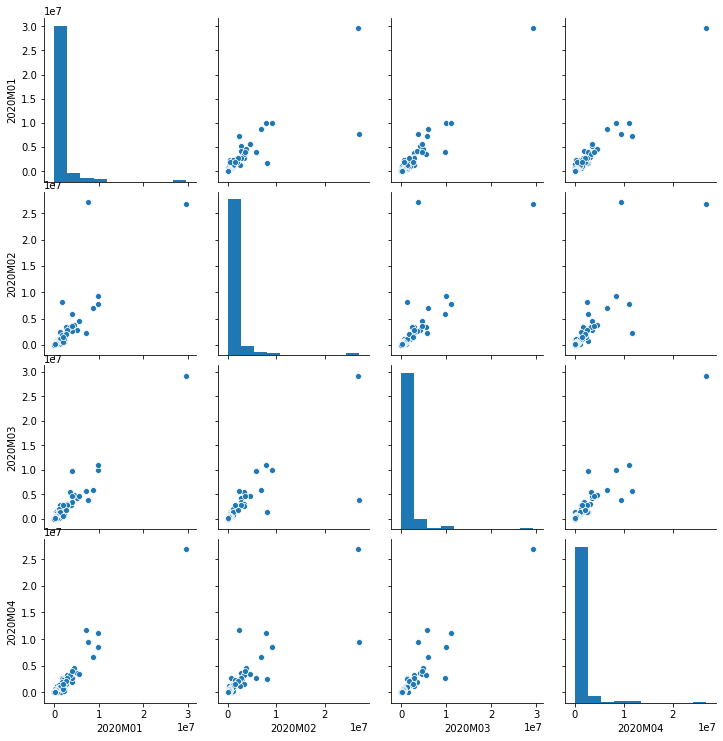

In [49]:
sb.pairplot(df)

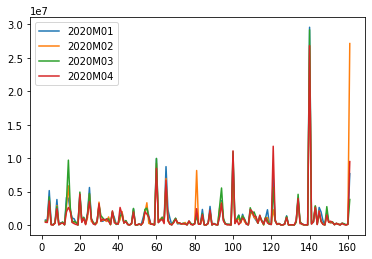

In [51]:
#šis grafiks īsti neko neparāda.... 
df.plot()

In [22]:
#datu filtrešanas funkcija
def dffilter(ie,uni='kg'):
    filtered = df.loc[(df['Virziens'] == ie) & (df['Vienibas'] == uni)]
    return filtered #.iloc[:,2:]

In [23]:
df_import = dffilter('Imports')
df_import[:5]

,Vienibas,Virziens,Grupa,2020M01,2020M02,2020M03,2020M04
82,kg,Imports,0201-Svaiga vai atdzesēta liellopu gaļa,152816,102632,124590,96664
83,kg,Imports,0202-Saldēta liellopu gaļa,179394,153553,179234,101273
84,kg,Imports,"0203-Cūkgaļa, svaiga, dzesināta vai saldēta",2315942,1095049,1706581,1541938
85,kg,Imports,"0204-Svaiga, atdzesēta vai saldēta aitu vai ka...",9222,5402,13490,2160
86,kg,Imports,"0205-Svaiga, atdzesēta vai saldēta zirgu, ēzeļ...",689,708,1920,661


In [59]:
df_export = dffilter('Eksports')
df_export[:5]

,Vienibas,Virziens,Grupa,2020M01,2020M02,2020M03,2020M04
122,kg,Eksports,0201-Svaiga vai atdzesēta liellopu gaļa,822619,712647,600387,616201
123,kg,Eksports,0202-Saldēta liellopu gaļa,92592,80154,75976,76734
124,kg,Eksports,"0203-Cūkgaļa, svaiga, dzesināta vai saldēta",201170,216570,219191,189780
125,kg,Eksports,"0204-Svaiga, atdzesēta vai saldēta aitu vai ka...",18048,14407,9308,4906
126,kg,Eksports,"0205-Svaiga, atdzesēta vai saldēta zirgu, ēzeļ...",0,0,0,0


## nolemu pameginat visu pārlikt vienā kolonna ar nosaukumu 'Datums'

In [60]:
df['Datums'] = ''

In [114]:
df

,Vienibas,Virziens,Grupa,2020M01,2020M02,2020M03,2020M04,Datums
2,EUR,Imports,0201-Svaiga vai atdzesēta liellopu gaļa,734204,523602,577550,392881,
3,EUR,Imports,0202-Saldēta liellopu gaļa,663515,588917,579336,361185,
4,EUR,Imports,"0203-Cūkgaļa, svaiga, dzesināta vai saldēta",5136957,2761347,4197937,3591849,
5,EUR,Imports,"0204-Svaiga, atdzesēta vai saldēta aitu vai ka...",87043,52621,148047,13796,
6,EUR,Imports,"0205-Svaiga, atdzesēta vai saldēta zirgu, ēzeļ...",1894,1947,5280,1817,
...,...,...,...,...,...,...,...,...
157,kg,Eksports,0709-Citi svaigi vai atdzesēti dārzeņi (izņ. p...,263001,243729,247346,214032,
158,kg,Eksports,0710-Saldēti dārzeņi (termiski neapstrādāti va...,136458,125933,184739,45160,
159,kg,Eksports,0711-Īslaicīgai glabāšanai iekonservēti dārzeņ...,5279,638,3464,2445,
160,kg,Eksports,"0712-Kaltēti dārzeņi, veseli, sagriezti gabali...",119381,104296,116606,66871,


In [115]:
list(df.columns)[3:-1]

['2020M01', '2020M02', '2020M03', '2020M04']

In [116]:
def dfdate(d):
    df0 = df.loc[:,['Grupa', 'Datums', 'Virziens', d, 'Vienibas']]
    df0.loc[:,'Datums'] = d
    df0.rename(columns={d :'Daudzums'}, inplace=True )
    return df0

In [117]:
dates = list(df.columns)[3:-1]
dates

['2020M01', '2020M02', '2020M03', '2020M04']

In [118]:
df0 = dfdate(dates[0])
df1 = dfdate(dates[1])
df2 = dfdate(dates[2])
df3 = dfdate(dates[3])

In [119]:
df_onecol = pd.concat([df0,df1,df2,df3])

In [147]:
def dfIEdate(unit,date):
    df_imp_eur = df_onecol.loc[(df_onecol['Virziens'] == 'Imports') & (df_onecol['Vienibas'] == unit) & (df_onecol['Datums'] == date)].loc[:,['Grupa','Daudzums']]
    df_exp_eur = df_onecol.loc[(df_onecol['Virziens'] == 'Eksports') & (df_onecol['Vienibas'] == unit) & (df_onecol['Datums'] == date)].loc[:,['Grupa','Daudzums']]
    df_merged = pd.merge(df_imp_eur,df_exp_eur,how='outer', on='Grupa')
    return df_merged


In [164]:
def dfAll(unit):
    concat = pd.concat([dfIEdate(unit,'2020M01'),dfIEdate('EUR','2020M02'),dfIEdate('EUR','2020M03'),dfIEdate('EUR','2020M04')])
    return concat


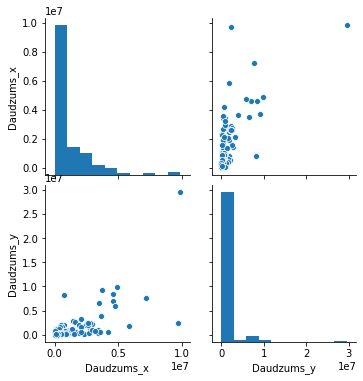

In [169]:
sb.pairplot(dfAll('kg'))

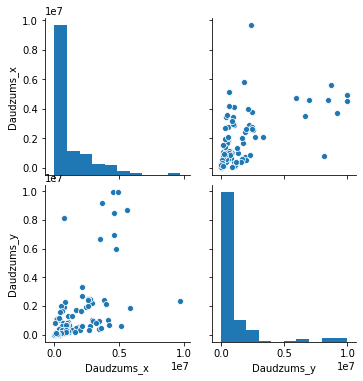

In [168]:
sb.pairplot(dfAll('EUR'))

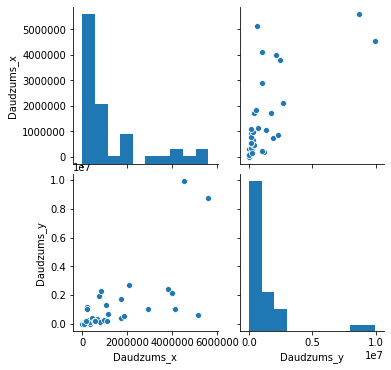

In [158]:
sb.pairplot(dfIEdate('EUR','2020M01'))

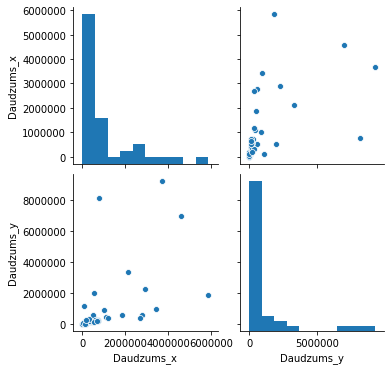

In [159]:
sb.pairplot(dfIEdate('EUR','2020M02'))

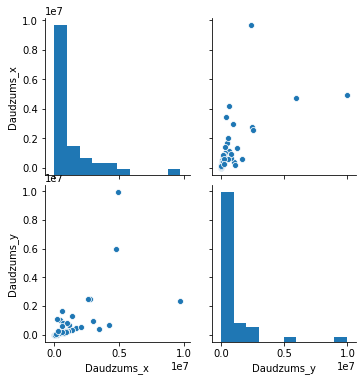

In [160]:
sb.pairplot(dfIEdate('EUR','2020M03'))

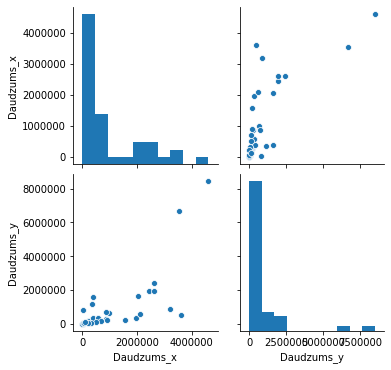

In [161]:
sb.pairplot(dfIEdate('EUR','2020M04'))